
## Week 3 Lecture - Classification Algorithms (Part 2) {-}


### Unit Convenor & Lecturer {-}
[George Milunovich](https://www.georgemilunovich.com)  
[george.milunovich@mq.edu.au](mailto:george.milunovich@mq.edu.au)

### References {-}

1. Python Machine Learning 3rd Edition by Raschka & Mirjalili - Chapter 3
2. Various open-source material

### Week 3 Learning Objectives {-}

- Introduce `scikit-learn` machine learning library
    - `train` vs `test` datasets: `train_test_split` library
    - Feature Scaling: train_test_split library
    - Fitting `Perceptron` & Measuring Classification Accuracy via `accuracy_score`
- Logistic Regression
    - logit function, log-odds, logistic signoid function
    - Predicting probabilities
    - Predicting class labels
    - `sklearn.linear_model.LogisticRegression` library
- Avoiding Overfitting via Regularization
    - Bias-Variance Tradeoff
    - L2 Shrinkage  
    
---

## Choosing a Classification Algorithm {-}

When facing a practical forecasting problem the issue of which classification algorithm to use arises. 

Two well-know quotes are relevent to this question:

- Statistician G. Box argued that **All models are wrong, but some are useful**
- Computer scientist D. Wolpert said that **No single classifier works best across all possible scenarios**  
<br>

Therefore, it is a good practice to **train several different forecasting models and compare their predictive performance**
- Choose the algorithm which produces best results in the given situation

There are 5 basic steps that we will follow when `training` a `supervised` machine learning algorithm:

1. Collect the data (labeled training examples)
2. Choose a performance/evaluation metric (how to measure classification performance)
3. Choose a classifier (classification model, e.g. Adaline) and an optimization algorithm (how to train the model, e.g. Gradient Descent)
4. Evaluate the performance of the model (fit the model, compute the value of the evaluation metric and see how well it performs)
5. Tune the algorithm (alterning hyperparameter values to get better performance)


---

## Training `perceptron` with `scikit-learn` {-}

In Week 2 we trained **perceptron** and **Adaline**. 

Lets repeat what we did in Week 2 with the Iris dataset
- Extend the dataset to all 150 observations;
- All 3 classess of Iris;
- We can import data from scikit-learn directly; 
- Scikit-learn has a number of popular datasets included in its library.


We will load the dataset from scikit-learn's `datasets` library
- [https://scikit-learn.org/stable/datasets.html](https://scikit-learn.org/stable/datasets.html)

---

### 1. Importing the Dataset {-}


```
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# print(type(iris))
# print(iris)

print(dir(iris))

# print(iris['DESCR'])

print(iris['feature_names'])
print(iris['data'][:10,:])


X = iris['data'][:, [2, 3]] # columns indexed 2 & 3 correspond to petal length and petal width
print(X.shape)

y = iris['target']
print(type(y), y.shape, y)
print('Class labels:', np.unique(y)) #np.unique() finds unique values
```


In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# print(type(iris))
# print(iris)

print(dir(iris))

# print(iris['DESCR'])

print(iris['feature_names'])
print(iris['data'][:10,:])


X = iris['data'][:, [2, 3]] # columns indexed 2 & 3 correspond to petal length and petal width
print(X.shape)

y = iris['target']
print(type(y), y.shape, y)
print('Class labels:', np.unique(y)) #np.unique() finds unique values

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 2)
<class 'numpy.ndarray'> (150,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class labels: [0 1 2]


In [11]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


The `dir()` function
- Above we used the `dir()` function in Python
    - The dir() function in Python is typically pronounced as "dir" (rhyming with "stir" or "fur").
    - It is short for "directory"
- One of the most useful buildin function
    - Can be used to learn about an object in Python when we don't know how to use it
- It returns a list of the names of the attributes (variables) and methods (functions) of an object
    - These names are the attributes and methods that are defined on the object, including its class attributes and inherited attributes
 

So in our `NumPy` array $y$ we have three integer values  

- 0 - Iris-setosa
- 1 - Iris-versicolor
- 2 - Iris-virginica

--- 

### 2. Splitting the Dataset {-}

In order to evaluate how well a trained model performs on **unseen** data (data not used for model fitting), split the dataset into separate 
- **training** dataset and 
- **test** dataset. 

We use a test dataset to avoid **overfitting**.

### Overfitting {-}
- Overfitting happens when the model captures "patterns" in the training data that do not repeat in new data
- These **perceived** patterns are actually **random** (consider getting 5 heads in a row out of 7 coin flips)
- The model then tries to extrapolate these false "patterns" to new data and makes inaccurate forecasts
- We say that the model **fails to generalize** to unseen data 

The image below illustrates this well. If you build a model (a bed in this case) to fit every detail of your data (how you sleep on a given night) many of the features of the model will not generalize to new data (how you sleep the following night). 

This happens because the model will take into account a lot of random noise (how you slept on the first night) which will not repeat in the future and hence will result in bad predictions (very uncomfortable sleep in the future). More on this in Week 5.

**In order to correctly evaluate the performance of a predictive model we need to test it on new data.**


<img src="images/overfitting.jpg" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/overfitting.jpg) -->

---

### Training and Test Datasets {-}

- Lets split our data into **training** and **test** datasets
- We will use `train_test_split` library from `sklearn` for this purpose


```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
print(y_train)
print(y_test)
```

Stratifying preserves the proportion of how data is distributed in the target column - and depicts that same proportion of distribution in the train_test_split. Take for example, if the problem is a binary classification problem, and the target column is having the proportion of:

- 80% = yes
- 20% = no

Since there are 4 times more 'yes' than 'no' in the target column, by splitting into train and test without stratifying, we might run into the trouble of having only the 'yes' falling into our training set, and all the 'no' falling into our test set. (i.e, the training set might not have 'no' in its target column)

Hence by Stratifying, the target column for:

- the training set has 80% of 'yes' and 20% of 'no', and also,
- the test set has 80% of 'yes' and 20% of 'no' respectively.

Hence, stratify makes even distribution of the target (label) in the train and test set - just as it is distributed in the original dataset.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)  #test_size: % total data, randon_state: how data shuffle b4 split (set a seed-randomize and retain this random everytime rerun code)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
print(y_train)
print(y_test)

[0 0 2 1 1 1 1 2 2 1 2 0 1 1 2 0 2 1 1 0 0 2 2 1 2 2 0 0 2 0 0 0 0 2 0 1 2
 1 2 2 1 1 2 2 1 1 2 1 1 0 2 0 2 0 0 1 0 1 2 0 2 0 0 2 2 0 1 0 0 1 2 1 1 0
 0 1 2 1 1 2 1 2 0 1 2 1 1 0 0 2 1 2 1 0 1 2 2 0 0 2 2 0 2 1 1 1 2 0 2 1 2
 0 2 0 1 0 1 0 0 0]
[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


In [19]:
len(y_train)

120

In [17]:
len(y_test)

30


**Note the following:**

- `train_test_split` function automatically splits between `training` and `test` dataset
    - The size of the test dataset is 20% of all available observations, and the size of the training set is the remaining 80%
- `train_test_split` also **randomises** the dataset before spliting it
    - Avoid for instance having all 0's and 1's in the training set and 2's in the test set
- `random_state = 1` sets a value for the random number generator which shuffles the dataset prior to splitting.
    - This allows us to **replicate** our results (data always shuffled in the same way) 
- In addition to shuffling the dataset note that we also employ `stratify = y` option in `train_test_split()`.
    - This ensures that the training and test datasets have the **same proportions** of class lables as the input dataset. 

Lets check counts and proportions of each class label in the 3 datasets using `bincount` function from NumPy
```
print(y_train)
print('Train Dataset', 'counts', np.bincount(y_train), 'proportions', np.bincount(y_train)/len(y_train))
print('Test Dataset', 'counts', np.bincount(y_test), 'proportions', np.bincount(y_test)/len(y_test))
```

In [3]:
print(y_train)
print('Train Dataset', 'counts', np.bincount(y_train), 'proportions', np.bincount(y_train)/len(y_train))
print('Test Dataset', 'counts', np.bincount(y_test), 'proportions', np.bincount(y_test)/len(y_test))

[0 0 2 1 1 1 1 2 2 1 2 0 1 1 2 0 2 1 1 0 0 2 2 1 2 2 0 0 2 0 0 0 0 2 0 1 2
 1 2 2 1 1 2 2 1 1 2 1 1 0 2 0 2 0 0 1 0 1 2 0 2 0 0 2 2 0 1 0 0 1 2 1 1 0
 0 1 2 1 1 2 1 2 0 1 2 1 1 0 0 2 1 2 1 0 1 2 2 0 0 2 2 0 2 1 1 1 2 0 2 1 2
 0 2 0 1 0 1 0 0 0]
Train Dataset counts [40 40 40] proportions [0.33333333 0.33333333 0.33333333]
Test Dataset counts [10 10 10] proportions [0.33333333 0.33333333 0.33333333]


---

### 3. Feature Scaling {-}

In Week 2 we discussed how standardization of features can help with the training of classifiers. 

- `scikit-learn` contains `preprocessing` module which contains a number of classes used for standardization
    - [https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)
- For now we will use `StandardScalar` class 
- Scale the data by doing the following transformation $X\sim(\mu, \sigma) \rightarrow Z(0, 1)$
    - If a feature has a variance that is many times larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.



- Note that we use `training` dataset to estimate the parameters $\mu \text{ and } \sigma$ which are then used to standardize both the `training` and `test` datasets. 
    - This prevents cheating and increasing forecast accuracy by assuming how the observations from the `test` dataset are distributed.

```
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3, suppress = True) # pretty printing

sc = StandardScaler()

sc.fit(X_train)

# print(dir(sc))
# print(sc.mean_, sc.scale_)


X_train_scaled = sc.transform(X_train)
print('means:', X_train.mean(axis=0), X_train_scaled.mean(axis=0))
print('sigmas', X_train.std(axis=0), X_train_scaled.std(axis=0))

X_test_scaled = sc.transform(X_test)
print('means:', X_test.mean(axis=0), X_test_scaled.mean(axis=0))
print('sigmas', X_test.std(axis=0), X_test_scaled.std(axis=0))

```


In [4]:
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3, suppress = True) # pretty printing

sc = StandardScaler()

sc.fit(X_train)

# print(dir(sc))
# print(sc.mean_, sc.scale_)


X_train_scaled = sc.transform(X_train)
print('means:', X_train.mean(axis=0), X_train_scaled.mean(axis=0))
print('sigmas', X_train.std(axis=0), X_train_scaled.std(axis=0))

X_test_scaled = sc.transform(X_test)
print('means:', X_test.mean(axis=0), X_test_scaled.mean(axis=0))
print('sigmas', X_test.std(axis=0), X_test_scaled.std(axis=0))

means: [3.79  1.204] [0. 0.]
sigmas [1.784 0.769] [1. 1.]
means: [3.63 1.18] [-0.09  -0.031]
sigmas [1.653 0.721] [0.927 0.938]


---

### 4. Training the Classifier {-}

Note that our dataset consists of three classes: 
1. setosa
2. versicolor
3. virginica 

Most scikit-learn clasifiers support **multiclass classification** by default via the **one-vs.rest (OvR)**/**one-vs-all (OvA)** method
- See Week 2 lecture notes for details



Let's implement `scikit-learn` library `Perceptron`
- See documentation [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
- To initialize it we set `eta0` which is the learning rate $(\eta)$, and `random_state` which is used in order to be able to reproduce the results 
- `random-state` is used to shuffle the data after each epoch

```
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=7)
ppn.fit(X_train_scaled, y_train)

print('--- Estimated Weights ---')
print('intercept:\n', ppn.intercept_)
print('coefficients:\n', ppn.coef_)
```


In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=7)
ppn.fit(X_train_scaled, y_train)

print('--- Estimated Weights ---')
print('intercept:\n', ppn.intercept_)
print('coefficients:\n', ppn.coef_)

--- Estimated Weights ---
intercept:
 [-0.1 -0.  -0.4]
coefficients:
 [[-0.073 -0.051]
 [ 0.297 -0.377]
 [ 0.379  0.327]]


- Why are there so many estimated weights (coefficients)?

---

### 5. Producing Forecasts and Measuring Accuracy {-}

Now that we've trained `scikit-learn` Perceptron we can employ it to classify our `test` dataset.

For each prediction $\hat{y}^{(i)}$ we could either have
- correct classification if $\hat{y}^{(i)} = y^{(i)}$
- misclassification if $\hat{y}^{(i)} \ne y^{(i)}$

**Misclassification Error**
- Misclassification error is the fraction of observations incorrectly classified
- Count the number of misclassified examples and divide by the number of observations 


$\text{Misclassification Error} = \frac{\text{Number of incorrectly classified observations}}{\text{Total Number of Observations}}$


**Classification Accuracy**
- Accuracy is the fraction of observations which are correctly classified  

$\text{Accuracy}=1-\text{Misclassification Error}$


---

```
y_train_pred = ppn.predict(X_train_scaled)

# print('Predictions:', y_train_pred)
# print('True Labels:', y_train)
print(40*'=')

print('Number of incorrectly classified in training set:', (y_train != y_train_pred).sum())

error_train = (y_train != y_train_pred).sum()/len(y_train)
print(f'Misclassification Error: {error_train:.3f}')
print(f'Accuracy: {1 - error_train:.3f}')

print(40*'=')

y_test_pred = ppn.predict(X_test_scaled)
print('Number of incorrectly classified in test set:', (y_test != y_test_pred).sum())
error_test = (y_test != y_test_pred).sum()/len(y_test)

print(f'Misclassification Error: {error_test:.3f}')
print(f'Accuracy: {1 - error_test:.3f}')
print(40*'=')


```


In [6]:
y_train_pred = ppn.predict(X_train_scaled)

# print('Predictions:', y_train_pred)
# print('True Labels:', y_train)
print(40*'=')

print('Number of incorrectly classified in training set:', (y_train != y_train_pred).sum())

error_train = (y_train != y_train_pred).sum()/len(y_train)
print(f'Misclassification Error: {error_train:.3f}')
print(f'Accuracy: {1 - error_train:.3f}')

print(40*'=')

y_test_pred = ppn.predict(X_test_scaled)
print('Number of incorrectly classified in test set:', (y_test != y_test_pred).sum())
error_test = (y_test != y_test_pred).sum()/len(y_test)

print(f'Misclassification Error: {error_test:.3f}')
print(f'Accuracy: {1 - error_test:.3f}')
print(40*'=')

Number of incorrectly classified in training set: 34
Misclassification Error: 0.283
Accuracy: 0.717
Number of incorrectly classified in test set: 9
Misclassification Error: 0.300
Accuracy: 0.700



---

`scikit-learn` provides a number of different **performance metrics** in its `metrics` module
- [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)
- **classification Accuracy** is one of such performance measures 
- Misclassification error $=1-\text{Accuracy}$.

```
from sklearn.metrics import accuracy_score
print(f'Accuracy = {accuracy_score(y_test, y_test_pred):.3f}')
```


In [7]:
from sklearn.metrics import accuracy_score
print(f'Accuracy = {accuracy_score(y_test, y_test_pred):.3f}')

Accuracy = 0.700



---

We can also use the `score` method which is function **built into** most `sklearn` classifier libraries
- It does not need to be imported before using
- Its a shortcut to first producing the forecast via `predict` and then computing the accuracy by importing `accuracy_score` and using it 



```
print(f'Accuracy = {ppn.score(X_test_scaled, y_test):.3f}')
```

In [8]:
print(f'Accuracy = {ppn.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.700


---

### Plotting Decision Regions {-}


We can re-use the code from Week 2 to plot the **decision regions**
- visualise how well the model separates the classes
- copy and paste the `plot_decision_regions` function from Week 2
- function is modified to depict test dataset examples


```
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# # To check recent matplotlib compatibility
# import matplotlib
# from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        
```

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# # To check recent matplotlib compatibility
# import matplotlib
# from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

--- 

- Visualisation code is now in computer memory
- Next we use it
- Note: although the model has been fitted on `training` dataset, we will use it to visualise the entire dataset


```
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
# print(X_combined_scaled.shape)

# print(y_train.shape)
# print(y_test.shape)
y_combined = np.hstack((y_train, y_test))
# print(y_combined.shape)

plot_decision_regions(X=X_combined_scaled, y=y_combined, classifier=ppn)

plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
```

(120, 2)
(30, 2)


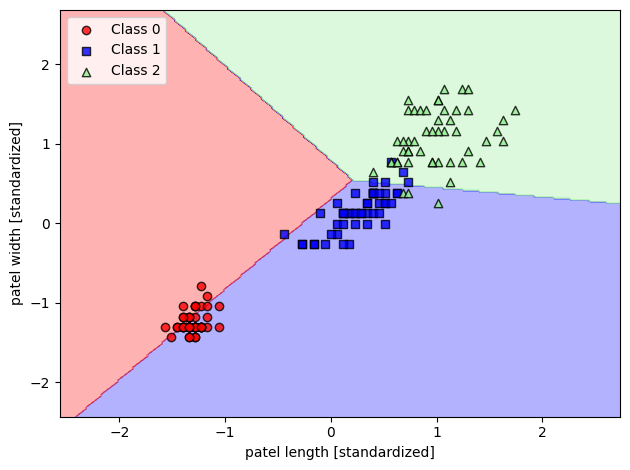

In [10]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
# print(X_combined_scaled.shape)

# print(y_train.shape)
# print(y_test.shape)
y_combined = np.hstack((y_train, y_test))
# print(y_combined.shape)

plot_decision_regions(X=X_combined_scaled, y=y_combined, classifier=ppn)

plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Conclusion**: the three flower classes cannot be perfectly separated by a linear decision boundary.   


---

# Modelling Class Probabilities via Logistic Regression {-}

The main problem with Perceptron is that it does not converge to fixed values for weights if classes are not perfectly linearly separable, see e.g. previous image. 
- There are other linear classifiers which will converge to a cost minimum even if he classes are not linearly separable, e.g. Adeline

- **Logistic regression** is one of the most widely used classification models in the industry
- Basic logistic regression is used for binary classification
    - **It predicts the probability of an outcome based on one or more predictor variables**
    - Its output is between 0 and 1 which can be interpreted as the probability of the target class
- Multiclass classification can be done either via *OvR* or multinomial logistic regression (softmax regression) 
    - see [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---

### Theory behind Logistic Regression {-}

Let us introduce the following:
- There are only two events, $A$ and $B$, e.g. 
    - $A=$pass unit, 
    - $B=$fail unit.
- Create a variable based on the range of outcomes 
    - $y=1$ if $A$ occurs and 
    - $y=0$ if $B$ occurs
- $p$ - probability of event $A$, e.g. $p = 60\%=0.6$
- $P(y=1)=p\Rightarrow P(y=0)=1-P(y=1)=1-p$
- **odds** - odds in favour of event $A$ (or equivalently $y=1$), 
    - $\text{odds}=\frac{p}{1-p}$
    - e.g. odds=$\frac{0.6}{0.4}=\frac{3}{2}$ this can be said "3 to 2 odds" meaning that out of 5 students, odds are that 3 students will pass (events $A$) and 2 students will fail (event $B$)

<br>


Having the above definitions we can now introduce the **logit** function which gives us **log-odds** 

$\text{logit}(p)=\text{logit(P[y=1])}=\text{ln}(\frac{p}{1-p})$


- **ln** is the natural logarithm function.
- Note the following:
    - $(\frac{p}{1-p})\in[0,\infty)$ 
    - $\text{logit}(p)=\text{ln}(\frac{p}{1-p})\in(-\infty, \infty)$ 



---
Next extend the above ideas to conditional probability

We are familiar with the notion of conditional probability $P(y=1|x)$ which gives the probability that $y=1$ given that $x$ takes on some value
- e.g. probability that a student will pass the unit $(y=1)$ given that the student has studied 4 hours per day $(x=4)$, i.e.  $P(y=1|x=4)$
- this is clearly different from $P(y=1)$

Similary we can define the **log-odds** using the logit function $\text{logit}\left(P(y=1|x)\right)=\text{ln}\left(\frac{P(y=1|x)}{1-P(y=1|x)}\right)$ 

Now lets say that $\text{logit}\left(P(y=1|x)\right)$ can be represented as a linear function of the features - $x$ variables:

$z=\text{logit}\left(P(y=1|x)\right)=w_0x_0+w_1x_1+\dots+w_mx_m=\sum_{i=0}^{m}w_ix_i=\mathbf{w}^{T}\mathbf{x}$

To be able to predict (get the probability) that a certain example belongs to a particular class we need the **inverse** of the logit function (log-odds)
- The inverse of the logistic function is called the **logistic sigmoid function** or just **sigmoid function** or **logistic tranformation**
- $P(y=1|x)=\phi(z)=\frac{1}{1+e^{-z}}$

where $z$ is the net input given by $z=\text{logit}\left(P(y=1|x)\right)=w_0x_0+w_1x_1+\dots+w_mx_m$ </span> in this case.

Lets see what $\phi(z)$ looks like:

```

import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1.0 + np.exp(-z))

z = np.arange(-7, 7.1, 0.1)
print(z, type(z))

phi_z = sigmoid(z)
print(phi_z)

plt.plot(z, phi_z)
plt.xlabel('z')
plt.axvline(0.0, color='gray')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
```


We observe the following:
- The graph resembles an S-shaped curve
- $z\rightarrow\infty\Rightarrow\phi(z)\rightarrow1$
- $z\rightarrow-\infty\Rightarrow\phi(z)\rightarrow0$
- Since $\phi(z)\in[0,1]$ it can be used to model probabilities. For example we can use it in:
    - Credit card fraud detection: predict whether a person will default and also the probability of default
    - Weather forecasting: predict if it will rain and the chance of rain
    - Medical applications: decide if a patient has a disease and the chance of the disease given the symptoms
    - Etc.



---

Consider the comparison of **Logistic Regression** with **Perceptron** and **Adaline**:

<hr style="width:15%;margin-left:0;">

**Perceptron**
    
$z=w_0 + w_1x_1 +  w_2x_2=\sum_{j=0}^{3}w_jx_j=\mathbf{w}^{T}\mathbf{x}$

$\phi(z)=\left\{ 
\begin{array}{cc}
1 & \text{if } z \ge 0 \hfill \\ 
-1 & \text{otherwise,}
\end{array}
\right.$

$\hat{y}=\phi(z)$

<hr style="width:15%;margin-left:0;">

**Adaline**

$z=w_0 + w_1x_1 + w_2x_2=\sum_{j=0}^{3}w_jx_j=\mathbf{w}^{T}\mathbf{x}$

$\phi(z)=z$

$\hat{y}=\left\{ 
\begin{array}{cc}
1 & \text{if } \phi(z) \ge  0 \hfill \\ 
-1 & \text{otherwise}
\end{array}
\right.$

<hr style="width:15%;margin-left:0;">

**Logistic Regression**

$z=w_0 + w_1x_1 +  w_2x_2=\sum_{j=0}^{3}w_jx_j=\mathbf{w}^{T}\mathbf{x}$

$\phi(z)=\frac{1}{1+e^{-z}}$

The sigmoid function is interpreted as the *conditional probability* of a particular example belonging to class 1:

- $P(y=1|x)=\phi(z)$
- $P(y=0|x)= 1- P(y=1|x)$

E.g. $\phi(z)=0.8$ means that the probability that the flower is Iris-Versicolor is 80% and the prob that it is Iris-Setosa is 20%.

$\hat{y}=\left\{ 
\begin{array}{cc}
1 & \text{if } \phi(z) \ge 0.5 \hfill \\ 
0 & \text{otherwise}
\end{array}
\right.$

Equivallently we can use

$\hat{y}=\left\{ 
\begin{array}{cc}
1 & \text{if } z \ge 0 \hfill \\ 
0 & \text{otherwise}
\end{array}
\right.$


<img src="images/image1.jpg" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/image1.jpg) -->

---

## Learning the Weights of the Logistic Cost Function {-}

The estimating (fitting) of the parameters in the Logistic Regression model is based on the principle of **Maximum Likelihood Estimation (MLE)**. 
- MLE is a method of estimating the parameters of a probability distribution by maximizing a **likelihood function**
- The point in the parameter space that maximizes the likelihood function (optimal weight) is called the **maximum likelihood estimate**. 
- Maximum Likelihood Estimation is beyond the scope of this unit
    - If interested in further details refer to the above URL as well as the textbook
    - [https://en.wikipedia.org/wiki/Maximum_likelihood_estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).



---

## Training a Logistic Regression Model with `scikit-learn` {-}

- `sklearn.linear_model.LogisticRegression` class
    - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- As mentioned above `scikit-learn` implements multiclass classification by default via two methods OvR or multinomial
    - `multi_class='ovr`
    - `multi_class='multinomial'`
    
```
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr') 
lr.fit(X_train_scaled, y_train)
plot_decision_regions(X_combined_scaled, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
```

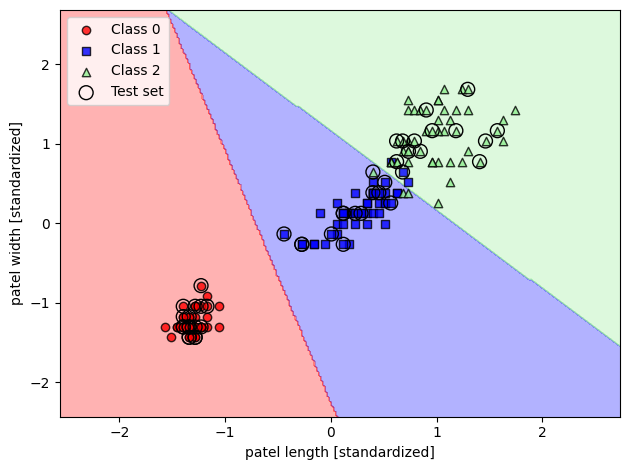

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr') #C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
lr.fit(X_train_scaled, y_train)
plot_decision_regions(X_combined_scaled, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
print(f'Accuracy = {ppn.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.700


We can also consider the values of the estimated weights and compare them to those of the perceptron algorithm discussed above

```
print('--- Estimated Weights ---')
print('intercept:\n', lr.intercept_)
print('coefficients:\n', lr.coef_)
```

As you can see there are a number of options we need to provide to initialize `LogisticRegression`

- Optimization algorithm 
- We use Limited-memory BFGS here using `solver='lbfgs'`. 
    - This is a more sophisticated optimization algorithm based on the second derivative (Hessian matrix). See [https://en.wikipedia.org/wiki/Limited-memory_BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)
- `C` parameter refers to 'Inverse of regularization strength' - see below


Lets make the following forecasts for the first 4 rows of the test set:
- forecast the probability that each of the four examples belongs in each of the three categories using `predict_proba()`
- forecast which category each of the four examples will belong to using `predict()`

```
print(X_test_scaled[:4, :])
print(2*'\n')

# print(lr.predict_proba(X_test_scaled[:4, :]))
print(np.around(lr.predict_proba(X_test_scaled[:4, :]), 3)) # round off to 3 decimal places
```

In [29]:
print(X_test_scaled[:4, :])
print(2*'\n')

[[ 1.407  0.775]
 [-1.284 -1.436]
 [-0.443 -0.135]
 [-1.228 -1.306]]





In [26]:
print(lr.predict_proba(X_test_scaled[:4, :]))

[[0.    0.433 0.567]
 [0.771 0.229 0.   ]
 [0.144 0.856 0.   ]
 [0.79  0.21  0.   ]]


In [34]:
print(np.around(lr.predict_proba(X_test_scaled[:4, :]), 3)) # round off to 3 decimal places
# each col represent %probability that data belong to group {0;1;2}

[[0.    0.433 0.567]
 [0.771 0.229 0.   ]
 [0.144 0.856 0.   ]
 [0.79  0.21  0.   ]]


In [33]:
lr.predict(X_test_scaled[:10, :]).reshape(-1,1) #decide classification based on group with highest %

array([[2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1]])

Given our classes 

- 0 - Iris-setosa
- 1 - Iris-versicolor
- 2 - Iris-virginica

we see that the first flower has about 57% chance of being Iris-virginica, While the second flower has 77% chance of being an Iris-setosa. These are conditional probabilities of each flower belonging to a class based on their petal characteristics. 

To get predicted class labels $\hat{y}^{(i)}\in{0, 1, 2}$ we just choose the class which corresponds with the **highest** probability

```
print(lr.predict_proba(X_test_scaled[:4, :]).argmax(axis=1))
```

A simpler way to do the same thing is 
```
print(lr.predict(X_test_scaled[:4, :]))
```

Note: When forecasting from a single example (single row slice) which has only one dimension we need to first create a 2-D array which `scikit-learn` expects. Do this using `reshape` command

```
print(X_test_scaled[0, :])
print(X_test_scaled[0, :].shape)
print(lr.predict(X_test_scaled[0, :]))


print(X_test_scaled[0, :].reshape(1, -1))
print(X_test_scaled[0, :].reshape(1, -1).shape)
print(lr.predict(X_test_scaled[0, :].reshape(1, -1)))
```

---
## Avoiding Overfitting via Regularization {-}

**Overfitting** - when a model performs well on training data but does not generalize well to unseen data (generates bad forecast on new data)  
**Underfitting** - when a model is too simple to capture the patterns found in training data 

<br>

**Bias-Variance Tradeoff**
- The bias-variance tradeoff is a concept in machine learning that describes the balance between two sources of error that affect the performance of predictive models. 



- **Bias** refers to the error introduced by approximating a real-world problem, which is often complex, by a simplified model
    - High bias is related to underfitting, where the model is **too simple** to capture the underlying patterns 
    - A model that is too simple cannot capture all the relevant patterns in the data 
    - High bias means that on average our predictions are bad -> there is a systematic error which is not due to randomness 
    - E.g. $X=0.1$ hours of study time -> $\hat{y} = 0$ (Fail) $X=4.1$ hours of study time -> $\hat{y} = 0$ (Fail)

- **Variance** refers to the error introduced by the model's sensitivity to small fluctuations in the training data
    - High variance is a result of overfitting
    - Overfitting typically happens when the model is too complex and has too many parameters and captures **random noise** in the training data as if it were a true signal
    - Since the model is overly complicated it produces vastly different predictions for very small variations in the features
    - E.g. $X=4.0$ hours of study time -> $\hat{y} = 1$ (Pass) $X=4.1$ hours of study time -> $\hat{y} = 0$ (Fail)
    - We say that such predictions have high variance


- **Achieving a good predictive model involves finding the right balance between bias and variance to minimize the total prediction error**
<br>

    

<img src="images/image2.jpg" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/image2.jpg) -->

**Regularization** is the process of adding information in order to prevent overfitting and reach a good bias-variance tradeoff.
- In ML regularization works by adding information to **penalize large parameter (weight) values**
    - This means that it works by making optimal weights smaller -> less influence from corresponding predictor variables 
    - For regularization to work properly all features must be on comparable scale -> **feature scaling** is important



In one sentence, regularization makes the model perform worse on training data so that it may perform better on holdout data.
ogistic regression is an optimization problem where the following objective function is minimized.

<img src="images/objectivefunction.jpg" alt="Drawing" style="width: 450px;"/>

where loss function looks like (at least for solver='lbfgs') the following:

<img src="images/lossfunction.jpg" alt="Drawing" style="width: 450px;"/>

Regularization adds a norm of the coefficients to this function. The following implements the L2 penalty.

<img src="images/l2penalty.jpg" alt="Drawing" style="width: 450px;"/>

From the equation, it's clear that the regularization term is there to penalize large coefficients (the minimization problem is solving for the coefficients that minimize the objective function). Since the size of each coefficient depends on the scale of its corresponding variable, scaling the data is required so that the regularization penalizes each variable equally. The regularization strength is determined by C and as C increases, the regularization term becomes smaller (and for extremely large C values, it's as if there is no regularization at all).

If the initial model is overfit (as in, it fits the training data too well), then adding a strong regularization term (with small C value) makes the model perform worse for the training data, but introducing such "noise" improves the model's performance on unseen (or test) data.

An example with 1000 samples and 200 features shown below. As can be seen from the plot of accuracy over different values of C, if C is large (with very little regularization), there is a big gap between how the model performs on training data and test data. However, as C decreases, the model performs worse on training data but performs better on test data (test accuracy increases). However, when C becomes too small (or the regularization becomes too strong), the model begins performing worse again because now the regularization term completely dominates the objective function.

<img src="images/example.jpg" alt="Drawing" style="width: 450px;"/>


**L2 regularization** (L2 shrinkage) most common, where $\lambda$ is called the **regularization parameter**

Regularization term $\frac{\lambda}{2}||w||^2=\frac{\lambda}{2}\sum_{j=1}^{m}w_j^2$ is often added to the Logistic Regression cost function, which will shrink (make smaller) estimated parameters (weights)

$J(w)=\sum_{i=1}^n\left[-y^{(i)}\text{ln}\left(\phi(z^{(i)})\right)-\left(1-y^{(i)}\right)\text{ln}\left(1-\phi(z^{(i)})\right)\right] + \frac{\lambda}{2}||w||^2$

- By increasing $\lambda$ we increase regularization strength, penalizing more large parameter values and hence obtaining more parameters closer to zero-> less overfit
- <span style='background:orange'>  In LogisticRegression $C=\frac{1}{\lambda}$ -> Small values of $C$ -> Reduce the magnitude of the estimated parameters
- We need to try different values of $C$ to optimise classification/predictive performance